In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

                             Introduction:

      In this study, we will study a data set of Top Hit Spotify Songs from 2000-to 2019, originating from Kaggle. The data is organized into 18 columns, each of which describes the track and its quality1.
A detailed description of all the columns content can be found here: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019".
 
      The columns of the data set (that we will use) are as follows:
artist: artist of track
song: name of track
duration_ms: duration of track in milliseconds
explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
danceability: how suitable the track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. 0 = least danceable, 1.0 = most danceable.
energy: measure from 0.0 to 1.0, a perceptual measure of intensity and activity
loudness: overall loudness in decibels
mode: modality (major or minor). Major = 1, minor = 0.

      We want to answer a predictive question: Can we use a song's traits to predict whether a song in 2010-2019 on Spotify is explicit or not? Answering this question is noteworthy because Spotify has an explicit content filter that allows users to filter out songs containing language that may be considered offensive to children1. However, Spotify's explicit content tag is based on information provided by the rights holder2; thus, not all tracks with explicit content are properly labelled and users must manually report those they missed. Hence, this study is set out to investigate an alternative solution to predict and thus label whether a song may be explicit or not. A rigorous answer to this question could help Spotify enhance its explicit content filter and improve user experience.


In [2]:
# read + clean + wrangle data ----------------------------------------------------
single_genre <- c('country', 'latin', 'Dance/Electronic', 'Folk/Acoustic',
'pop', 'rock','hip hop','R&B','metal','jazz','blues','classical','World/Traditional')

In [3]:
song <- read_csv('https://raw.githubusercontent.com/nicolelassetter/DSCI100-project-g28/main/songs_normalize.csv') %>%
    mutate(genre <- as_factor(genre))%>%
    filter(genre %in% single_genre)
song

Parsed with column specification:
cols(
  artist = col_character(),
  song = col_character(),
  duration_ms = col_double(),
  explicit = col_logical(),
  year = col_double(),
  popularity = col_double(),
  danceability = col_double(),
  energy = col_double(),
  key = col_double(),
  loudness = col_double(),
  mode = col_double(),
  speechiness = col_double(),
  acousticness = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  valence = col_double(),
  tempo = col_double(),
  genre = col_character()
)



artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre <- as_factor(genre)
<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,1.77e-05,0.3550,0.894,95.053,pop,pop
*NSYNC,Bye Bye Bye,200560,FALSE,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,1.04e-03,0.0845,0.879,172.656,pop,pop
Eminem,The Real Slim Shady,284200,TRUE,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.00e+00,0.0454,0.760,104.504,hip hop,hip hop
Modjo,Lady - Hear Me Tonight,307153,FALSE,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,2.93e-02,0.0634,0.869,126.041,Dance/Electronic,Dance/Electronic
Gigi D'Agostino,L'Amour Toujours,238759,FALSE,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.03280,4.82e-02,0.3600,0.808,139.066,pop,pop
Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,FALSE,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.08130,3.24e-01,0.5330,0.960,129.962,pop,pop
Bomfunk MC's,Freestyler,306333,FALSE,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.02910,3.25e-01,0.2520,0.568,163.826,pop,pop
Anastacia,I'm Outta Love - Radio Edit,245400,FALSE,1999,64,0.761,0.716,10,-5.800,0,0.0560,0.39600,0.00e+00,0.0771,0.649,119.410,pop,pop
Alice Deejay,Better Off Alone,214883,FALSE,2000,73,0.671,0.880,8,-6.149,0,0.0552,0.00181,6.91e-01,0.2850,0.782,136.953,pop,pop


In [4]:
# split data to Training + Testing Data ---------------------------------------------
song_split <- initial_split(song, prop = 0.75, strata = explicit)
song_train <- training(song_split)
track_test <- testing(song_split)

In [5]:
## Plots that shows little to no relationship to explicitness
p00 <- ggplot(song_train,aes(x = popularity,color = explicit))+geom_bar()+scale_fill_brewer(palette = "Set1")
p01 <- ggplot(song_train,aes(x = year,color = explicit))+geom_bar()+scale_fill_brewer(palette = "Set1")
p02 <- ggplot(song_train,aes(x = energy ,color = explicit))+geom_bar()+scale_fill_brewer(palette = "Set1")
p03 <- ggplot(song_train,aes(x = loudness,color = explicit))+geom_bar()+scale_fill_brewer(palette = "Set1")
p04 <- ggplot(song_train,aes(x = mode ,color = explicit))+geom_bar()+scale_fill_brewer(palette = "Set1")
p05 <- ggplot(song_train,aes(x = valence ,color = explicit))+geom_histogram()
p06 <- ggplot(song_train,aes(x = danceability ,color = explicit))+geom_histogram()
p07 <- ggplot(song_train,aes(x = popularity ,color = explicit))+geom_histogram()
p08 <- ggplot(song_train,aes(x = key ,color = explicit))+geom_histogram()
p09 <- ggplot(song_train,aes(x = loudness ,color = explicit))+geom_histogram()
p10 <- ggplot(song_train,aes(x = acousticness ,color = explicit))+geom_histogram()
p11 <- ggplot(song_train,aes(x = instrumentalness ,color = explicit))+geom_histogram()
p12 <- ggplot(song_train,aes(x = liveness ,color = explicit))+geom_histogram()
p13 <- ggplot(song_train,aes(x = valence ,color = explicit))+geom_histogram()
p14 <- ggplot(song_train,aes(x = tempo ,color = explicit))+geom_histogram()
p15 <- ggplot(song_train,aes(x = genre ,color = explicit))+geom_bar()

In [6]:
# summarise only training data info into tables ----------------------------------------
n_genre_table_training <- song_train %>%
    group_by(genre, explicit) %>%
    summarize(n = n()) #%>%
    #pivot_wider(names_from = explicit, values_from = n)
n_genre_table_training

`summarise()` regrouping output by 'genre' (override with `.groups` argument)



genre,explicit,n
<chr>,<lgl>,<int>
country,FALSE,7
Dance/Electronic,FALSE,26
Dance/Electronic,TRUE,5
hip hop,FALSE,15
hip hop,TRUE,83
latin,FALSE,8
latin,TRUE,3
metal,FALSE,6
metal,TRUE,2


In [7]:
mean_table_training <- song_train %>%
    select(speechiness, acousticness, energy, danceability) %>%
    map_df(mean)

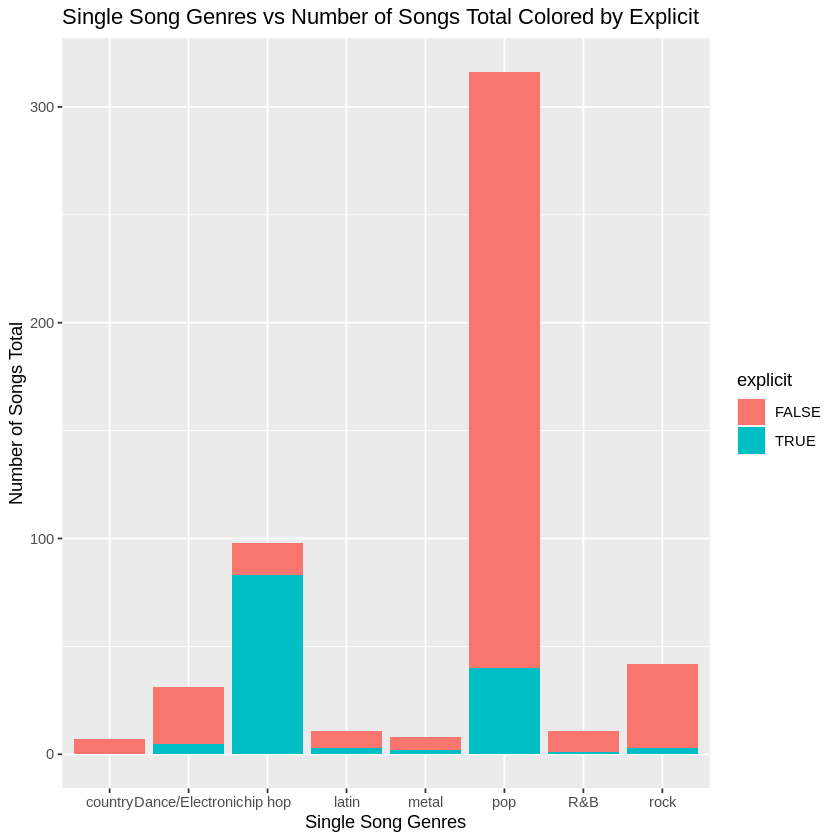

In [8]:
# Using training data: visualise data to find possible predictors relevant for analysis ----

# Bar: genre vs count (Number of Songs Total)
plot1 <- n_genre_table_training %>%
    ggplot(aes(x = genre, fill = explicit, y = n)) +
    geom_bar(stat = 'identity') +
    labs(x = "Single Song Genres", y = 'Number of Songs Total') +
    ggtitle('Single Song Genres vs Number of Songs Total Colored by Explicit')
plot1

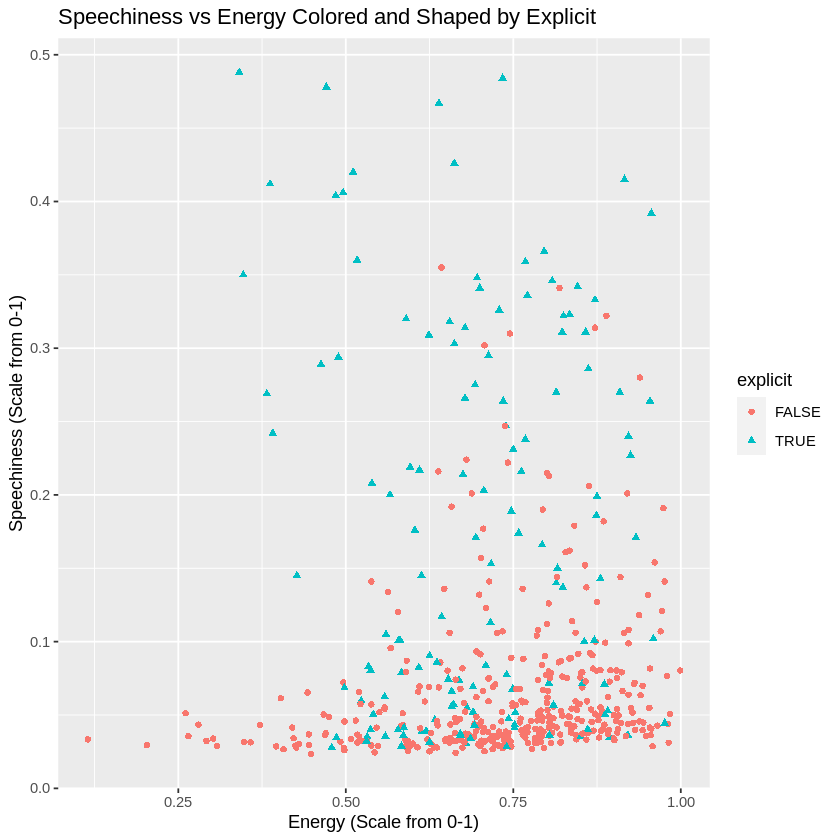

In [9]:
# Scatter: Speechiness vs Energy Colored and Shaped by Explicit
plot2 <- song_train %>%
    ggplot(aes(x = energy, y = speechiness, colour = explicit, shape = explicit)) +
    geom_point() +
    labs(x = "Energy (Scale from 0-1)", y = 'Speechiness (Scale from 0-1)') +
    ggtitle('Speechiness vs Energy Colored and Shaped by Explicit')
plot2

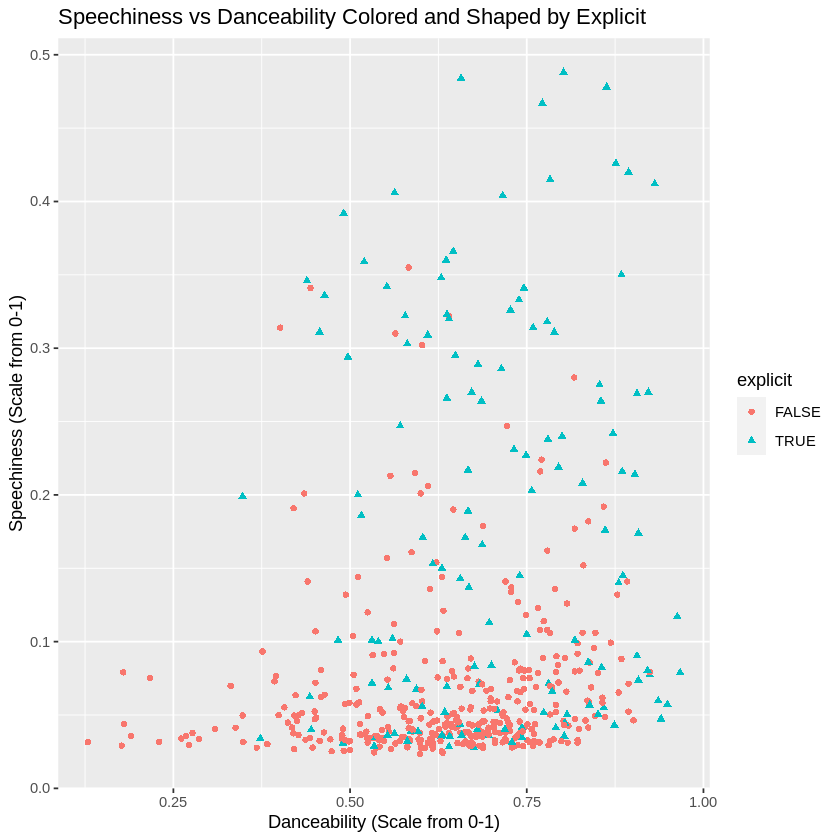

In [10]:
# Scatter: Speechiness vs Danceability Colored and Shaped by Explicit
plot3 <- song_train %>%
    ggplot(aes(x = danceability, y = speechiness, colour = explicit, shape = explicit)) +
    geom_point() +
    labs(x = "Danceability (Scale from 0-1)", y = 'Speechiness (Scale from 0-1)') +
    ggtitle('Speechiness vs Danceability Colored and Shaped by Explicit')
plot3

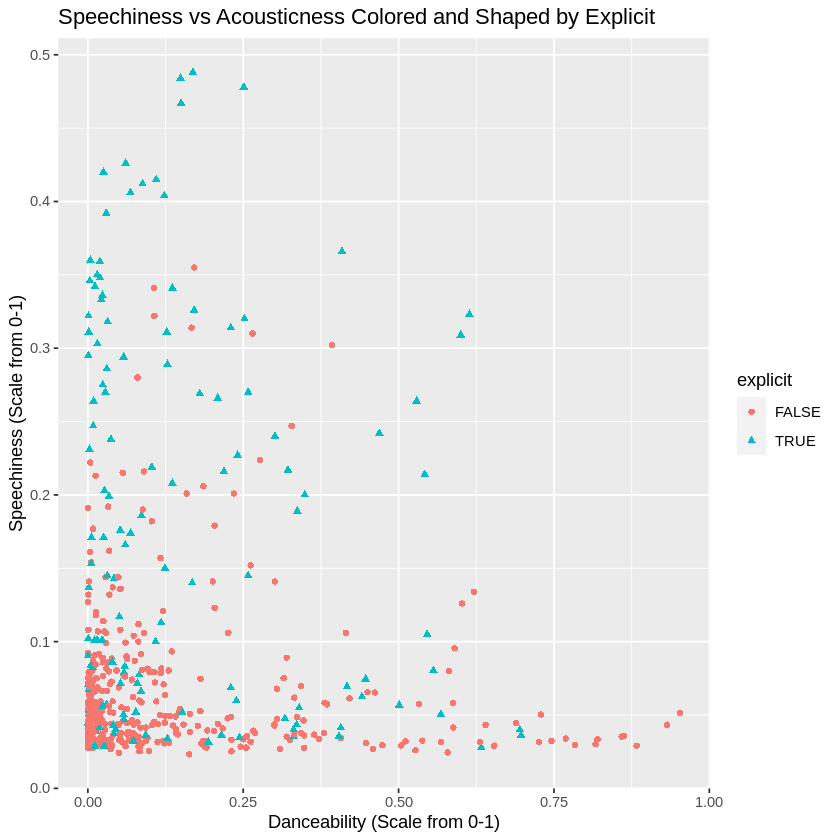

In [11]:
# Scatter : Speechiness vs Acousticness Colored and Shaped by Explicit
plot4 <- song_train %>%
    ggplot(aes(x = acousticness, y = speechiness, colour = explicit, shape = explicit)) +
    geom_point() +
    labs(x = "Danceability (Scale from 0-1)", y = 'Speechiness (Scale from 0-1)') +
    ggtitle('Speechiness vs Acousticness Colored and Shaped by Explicit')
plot4